<a href="https://colab.research.google.com/github/seolgiya/2024.DB/blob/main/db_prj(Virtual_office).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **개발하고자 하는 서비스 (가상 오피스 서비스)**

**타겟 기능**: 일, 미팅

'일'

**1) 시나리오 작성**

삽입: 새로운 일, 프로젝트 등 정보 삽입

검색: 마감일, 상태 등 검색

삭제: 프로젝트가 무산 된 경우 삭제



**2)SQL 쿼리:**






In [1]:
#Install & load sqlite3
#!pip install sqlite3
import sqlite3

In [3]:
# Connecting to sqlite
# connect object
conn = sqlite3.connect('VIRTUAL_OFFICE') #DB이름: VIRTUAL_OFFICE

In [4]:
cursor_obj = conn.cursor()

DB 테이블 생성

**TASK(일) table**

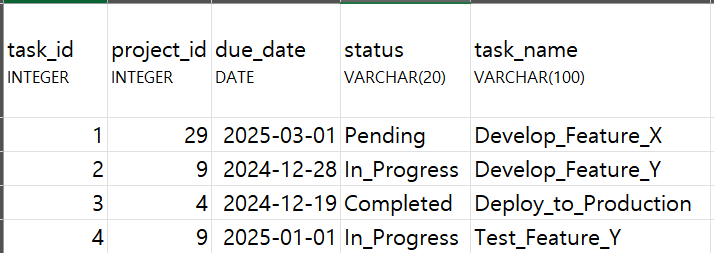

In [5]:
cursor_obj.execute("DROP TABLE IF EXISTS TASK")

In [7]:
# Creating table
table = """
CREATE TABLE IF NOT EXISTS TASK (
    task_id INTEGER PRIMARY KEY NOT NULL,
    project_id INTEGER,
    due_date DATE,
    status VARCHAR(20),
    task_name VARCHAR(100)
);
"""
#SQL문을 table에 넣어둠
cursor_obj.execute(table) #위에서 정의한 sql문을 던져둠

print("Table is Ready")

Table is Ready


--테이블에 데이터 **삽입**

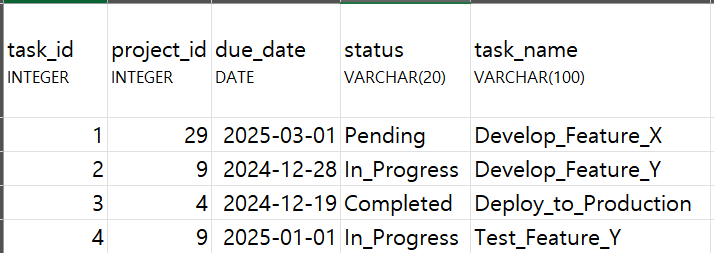

In [8]:
cursor_obj.execute('''insert into TASK values (1, 29, '2025-03-01', 'Pending', 'Develop_Feature_X')''')
cursor_obj.execute('''insert into TASK values (2, 9, '2024-12-28', 'In_Progress', 'Develop_Feature_Y')''')
cursor_obj.execute('''insert into TASK values (3, 4, '2024-12-19', 'Completed', 'Deploy_to_Production')''')
cursor_obj.execute('''insert into TASK values (4, 9, '2025-01-01', 'In_Progress', 'Test_Feature_Y')''')

--**검색**

전부 검색

In [9]:
statement = '''SELECT * FROM TASK'''
cursor_obj.execute(statement)

print("All the data")
output_all = cursor_obj.fetchall()
for row_all in output_all:
    print(row_all)

All the data
(1, 29, '2025-03-01', 'Pending', 'Develop_Feature_X')
(2, 9, '2024-12-28', 'In_Progress', 'Develop_Feature_Y')
(3, 4, '2024-12-19', 'Completed', 'Deploy_to_Production')
(4, 9, '2025-01-01', 'In_Progress', 'Test_Feature_Y')


In_Progress(진행 중)인 데이터 검색

In [11]:
statement = ''' SELECT * FROM TASK WHERE status = 'In_Progress' '''
cursor_obj.execute(statement)

print("All the data")
output_all = cursor_obj.fetchall()
for row_all in output_all:
    print(row_all)

All the data
(2, 9, '2024-12-28', 'In_Progress', 'Develop_Feature_Y')
(4, 9, '2025-01-01', 'In_Progress', 'Test_Feature_Y')


마감일이 제일 빠른 데이터 검색

In [12]:
statement = ''' SELECT * FROM TASK WHERE due_date = (SELECT MIN(due_date) FROM TASK)'''
cursor_obj.execute(statement)

print("All the data")
output_all = cursor_obj.fetchall()
for row_all in output_all:
    print(row_all)

All the data
(3, 4, '2024-12-19', 'Completed', 'Deploy_to_Production')


--**삭제**

project_id 9번이 무산돼서 삭제해야 하는 쿼리

In [13]:
query_drop_table = "DELETE FROM TASK WHERE project_id = 9;"
cursor_obj.execute(query_drop_table)

In [14]:
statement = '''SELECT * FROM TASK'''
cursor_obj.execute(statement)

print("All the data")
output_all = cursor_obj.fetchall()
for row_all in output_all:
    print(row_all)

All the data
(1, 29, '2025-03-01', 'Pending', 'Develop_Feature_X')
(3, 4, '2024-12-19', 'Completed', 'Deploy_to_Production')


**굵은 텍스트**'미팅'

**1) 시나리오 작성**

삽입: 미팅시간, 주제 등 저장

검색: 특정 미팅 주제 검색

삭제: 미팅 취소 시 삭제

**2) SQL 쿼리**

MEETING TABLE 생성

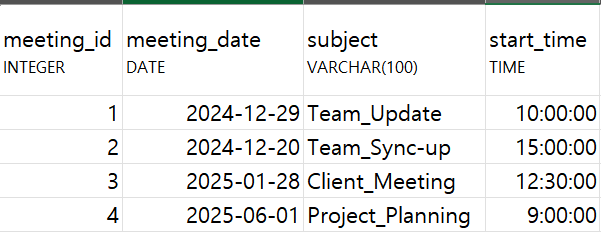

In [22]:
cursor_obj.execute("DROP TABLE IF EXISTS MEETING")

In [26]:
# Creating table
table = """
CREATE TABLE IF NOT EXISTS MEETING (
    meeting_id INTEGER PRIMARY KEY NOT NULL,
    meeting_date DATE,
    subject VARCHAR(100),
    start_time TIME
    );
"""
#SQL문을 table에 넣어둠
cursor_obj.execute(table) #위에서 정의한 sql문을 던져둠

print("Table is Ready")

Table is Ready


--테이블에 데이터 **삽입**

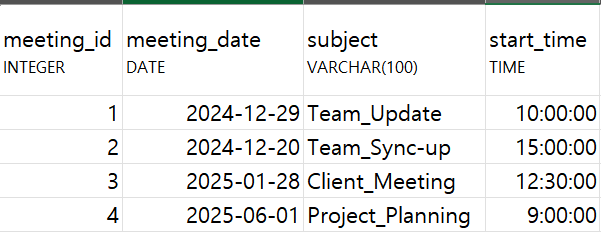

In [27]:
cursor_obj.execute('''insert into MEETING values (1, '2024-12-29', 'Team_Update', '10:00:00')''')
cursor_obj.execute('''insert into MEETING values (2, '2024-12-20', 'Team_Sync-up', '15:00:00')''')
cursor_obj.execute('''insert into MEETING values (3, '2025-01-28', 'Clienct_Meeting', '12:30:00')''')
cursor_obj.execute('''insert into MEETING values (4, '2025-06-01', 'Project_Planning', '9:00:00')''')

-- **검색**

전부 검색

In [28]:
statement = ''' SELECT * FROM MEETING'''
cursor_obj.execute(statement)
print("All the data")
output_all = cursor_obj.fetchall()
for row_all in output_all:
    print(row_all)

All the data
(1, '2024-12-29', 'Team_Update', '10:00:00')
(2, '2024-12-20', 'Team_Sync-up', '15:00:00')
(3, '2025-01-28', 'Clienct_Meeting', '12:30:00')
(4, '2025-06-01', 'Project_Planning', '9:00:00')


미팅 시작 시간이 10:00:00 인 미팅 검색

In [29]:
statement = ''' SELECT * FROM MEETING WHERE start_time = '10:00:00' '''
cursor_obj.execute(statement)
print("All the data")
output_all = cursor_obj.fetchall()
for row_all in output_all:
    print(row_all)

All the data
(1, '2024-12-29', 'Team_Update', '10:00:00')


Team_Update 하는 미팅 날짜 검색

In [30]:
statement = ''' SELECT meeting_date FROM MEETING WHERE subject = 'Team_Update' '''
cursor_obj.execute(statement)
print("All the data")
output_all = cursor_obj.fetchall()
for row_all in output_all:
    print(row_all)

All the data
('2024-12-29',)


--**삭제**

Client_Meeting 취소 돼서 삭제

In [31]:
query_drop_table = "DELETE FROM MEETING WHERE subject = 'Client_Meeting';"
cursor_obj.execute(query_drop_table)

In [32]:
statement = '''SELECT * FROM MEETING'''
cursor_obj.execute(statement)

print("All the data")
output_all = cursor_obj.fetchall()
for row_all in output_all:
    print(row_all)

All the data
(1, '2024-12-29', 'Team_Update', '10:00:00')
(2, '2024-12-20', 'Team_Sync-up', '15:00:00')
(3, '2025-01-28', 'Clienct_Meeting', '12:30:00')
(4, '2025-06-01', 'Project_Planning', '9:00:00')
